In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
def ref_poisson(rate, t_len, refac=5):
    t = 0
    spikes = []
    x_rand = np.random.uniform
    
    while t < t_len:
        
        t -= np.log(x_rand())/rate
        spikes.append(t)
        t += refac
    return np.array(spikes)

In [11]:
spk_res = []
for _ in range(50):
    spk_res.append(ref_poisson(25.0/1000.0, 10*1000))

In [14]:
tmp = spk_res[0]
tmp[tmp < 1000].shape

(26,)

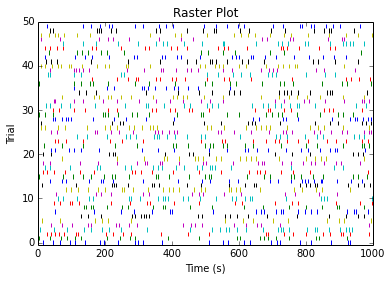

In [19]:
color_cycle = plt.rcParams['axes.color_cycle']

# plot the spike raster
for z_i, ze in enumerate(list(spk_res)):
    color = [color_cycle[z_i % len(color_cycle)]]
    plt.eventplot(ze[ze < 1000], colors=color, lineoffsets=[1*z_i])
plt.xlim(0, 1000)
plt.ylim(-0.5, 1*len(spk_res))
plt.ylabel("Trial")
plt.xlabel("Time (s)")
plt.title("Raster Plot")
plt.savefig("spike-raster")

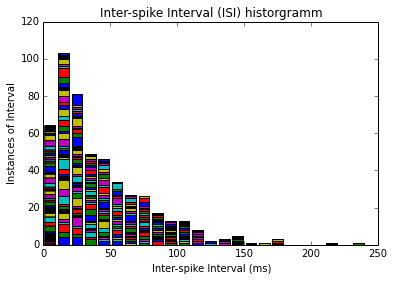

In [44]:
# ISI histogramm
bins = np.arange(0, 505, 10)
isi_res = []
for s_r in spk_res:
    isi_res.append(np.diff(s_r[s_r < 500]))

plt.hist(isi_res, bins=bins, stacked=True)
plt.title("Inter-spike Interval (ISI) historgramm")
plt.ylabel("Instances of Interval")
plt.xlabel("Inter-spike Interval (ms)")
plt.savefig("isi-hist")

In [25]:
# get the firing rate
bins = np.arange(0, 505, 10)
multi_trial_rate = np.zeros((bins.shape[0] - 1, len(spk_res)))
for z_i, s_r in enumerate(spk_res):
    multi_trial_rate[:, z_i] = np.histogram(s_r[s_r < 500], bins=bins)[0]

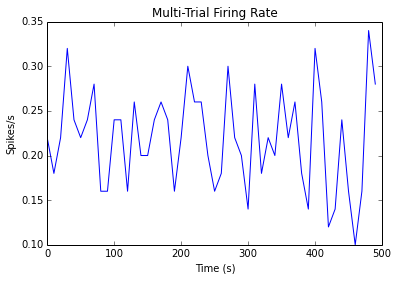

In [27]:
plt.plot(bins[:-1], np.mean(multi_trial_rate, axis=1))
plt.title("Multi-Trial Firing Rate")
plt.ylabel("Spikes/s")
plt.xlabel("Time (s)")
plt.savefig("multi-fr")

In [49]:
coef_tmp = []

for s_r in spk_res:
    isis = np.diff(s_r)
    coef_tmp.extend(isis)
    
coef_tmp = np.array(coef_tmp)

In [50]:
print(np.std(coef_tmp)/np.mean(coef_tmp))

0.890346929907


In [60]:
def get_fano(spks):
    spk_count = []

    for s_r in spks:
        spk_count.append(s_r[s_r < 100].shape[0])
    return np.var(spk_count)/np.mean(spk_count)

In [61]:
print(get_fano(spk_res))

1.06357142857


In [62]:
new_spk_res = []
for _ in range(50):
    new_spk_res.append(ref_poisson(25.0/1000.0, 10*1000, 1))

In [63]:
print(get_fano(new_spk_res))

0.937049180328
